In [2]:
import numpy as np
import pandas as pd

%matplotlib inline

import seaborn as sns
from matplotlib import pyplot as plt

data_source = 'iris.data'
d = pd.read_table(
  data_source,
  delimiter=',',
  header=None,
  names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'answer']
)
d

dX = d.loc[:,'sepal_length':'petal_width']
dy = d['answer']
print(dX.head())
print(dy.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: answer, dtype: object


In [3]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

X_train, X_holdout, y_train, y_holdout = train_test_split(dX, dy, test_size=0.3, random_state=12)
tree = DecisionTreeClassifier(max_depth=5, random_state=21, max_features=2)
tree.fit(X_train, y_train)

tree_pred = tree.predict(X_holdout)
accuracy = accuracy_score(y_holdout, tree_pred)
print(accuracy)

0.9777777777777777


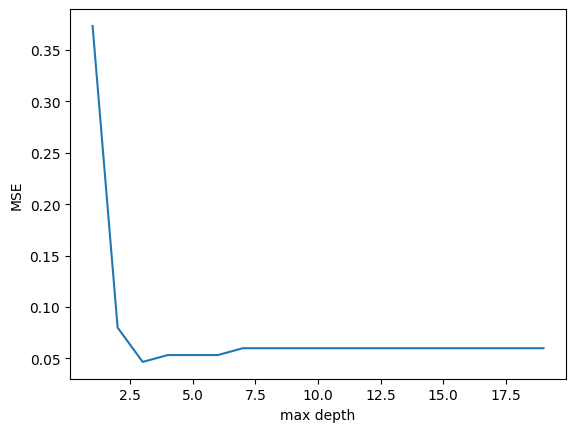

In [4]:
d_list = list(range(1, 20))

cv_scores = []

for d in d_list:
  tree = DecisionTreeClassifier(max_depth=d, random_state=21, max_features=2)
  scores = cross_val_score(tree, dX, dy, cv=10, scoring='accuracy')
  cv_scores.append(scores.mean())

MSE = [1-x for x in cv_scores]

plt.plot(d_list, MSE)
plt.xlabel('max depth')
plt.ylabel('MSE')
plt.show()

d_min = min(MSE)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

dtc = DecisionTreeClassifier(max_depth=10, random_state=21, max_features=2)
tree_params = { 'max_depth': range(1, 20), 'max_features': range(1, 4) }
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)
tree_grid.fit(dX, dy)

print('\n')
print('Best parameters: ', tree_grid.best_params_)
print('Cross validation scores: ', tree_grid.best_score_)

tree.export_graphviz(
  tree_grid.best_estimator_,
  feature_names=dX.columns,
  class_names=dy.unique(),
  out_file='iris_tree.dot',
  filled=True,
  rounded=True,
)


Fitting 10 folds for each of 57 candidates, totalling 570 fits


Best parameters:  {'max_depth': 2, 'max_features': 3}
Cross validation scores:  0.9533333333333334


c:\Python311\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier

plot_markers = ['r', 'g^', 'bo']
answers = dy.unique()

# Создаем матрицу подграфиков 4x4
f, places = plt.subplots(4, 4, figsize=(16, 16))

# Определяем минимальные и максимальные значения признаков
fmin = dX.min() - 0.5
fmax = dX.max() + 0.5
plot_step = 0.02

# Перебираем все пары признаков
for i in range(4):
  for j in range(4):
    if i != j:
      xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                          np.arange(fmin[j], fmax[j], plot_step))

      model = DecisionTreeClassifier(max_depth=3, random_state=21, max_features=2)
      model.fit(dX.iloc[:, [i, j]], dy)

      p = model.predict(np.c_[xx.ravel(), yy.ravel()])
      p = p.reshape(xx.shape)

      p[p==answers[0]] = 0
      p[p==answers[1]] = 1
      p[p==answers[2]] = 2

      category_to_int = {category: i for i, category in enumerate(answers)}
      p = np.vectorize(lambda x: category_to_int[x])(p)

      places[i, j].contourf(xx, yy, p, cmap='Pastel1')

    for id_answer in range(len(answers)):
      idx = np.where(dy == answers[id_answer])

      if i == j:
          places[i, j].hist(dX.iloc[idx].iloc[:, i],
                          color=plot_markers[id_answer][0],
                          histtype='step')
      else:
          places[i, j].plot(dX.iloc[idx].iloc[:, i], dX.iloc[idx].iloc[:, j],
                          plot_markers[id_answer],
                          label=answers[id_answer], markersize=6)

    if j == 0:
        places[i, j].set_ylabel(dX.columns[j])
    if i == 3:
        places[i, j].set_xlabel(dX.columns[i])

# Индивидуальное задание

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline

import seaborn as sns
from matplotlib import pyplot as plt

# Загрузка данных о сердечных заболеваниях в Швейцарии
data_source = 'processed.switzerland.data'
d = pd.read_table(
  data_source,
  delimiter=',',
  header=None,
  names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
)
d

# выкидываем поля oldpeak и num а также вытаскиваем целевое поле
dX = d.drop('oldpeak', axis=1)
dX = dX.drop('num', axis=1)
dy = d['num']
print(dX.head())
print(dy.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  slope  ca  thal
0   32    1   1        95     0    0        0      127      0      1   0     0
1   34    1   4       115     0    0        0      154      0      1   0     0
2   35    1   4         0     0    0        0      130      1      0   0     7
3   36    1   4       110     0    0        0      125      1      2   0     6
4   38    0   4       105     0    0        0      166      0      1   0     0
0    1
1    1
2    3
3    1
4    2
Name: num, dtype: int64


In [3]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

X_train, X_holdout, y_train, y_holdout = train_test_split(dX, dy, test_size=0.3, random_state=12)
# Обучение с помощью дерева решений
tree = DecisionTreeClassifier(max_depth=5, random_state=21, max_features=2)
tree.fit(X_train, y_train)

# предсказание результата и измерение точности
tree_pred = tree.predict(X_holdout)
accuracy = accuracy_score(y_holdout, tree_pred)
print('Точность получилась: ', accuracy)

Точность получилась:  0.3783783783783784


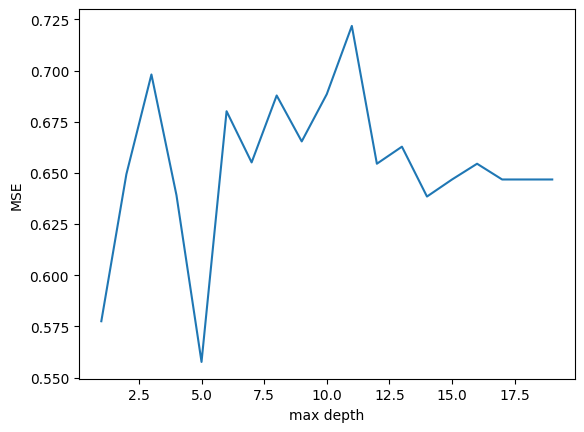

In [23]:

import warnings

with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  # построение графика зависимости между max_depth и MSE при max_features=2
  d_list = list(range(1, 20))

  cv_scores = []

  for d in d_list:
    tree = DecisionTreeClassifier(max_depth=d, random_state=21, max_features=2)
    scores = cross_val_score(tree, dX, dy, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

  MSE = [1-x for x in cv_scores]

  plt.plot(d_list, MSE)
  plt.xlabel('max depth')
  plt.ylabel('MSE')
  plt.show()

  d_min = min(MSE)

- На данном графике зависимости максимально грубины от квадрата ошики, можно сделать вывод, что при max_features=2 минимальный уровень ошибки был достигнут при max depth значении равном 5

In [4]:

import warnings

with warnings.catch_warnings():
  warnings.simplefilter("ignore")

  from sklearn.model_selection import GridSearchCV
  from sklearn import tree

  dtc = DecisionTreeClassifier(max_depth=10, random_state=21, max_features=2)
  tree_params = { 'max_depth': range(1, 20), 'max_features': range(1, 4) }
  # Вычисление наилучших значений max_depth и max_features с помощью GridSearchCV
  tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)
  tree_grid.fit(dX, dy)

  print('\n')
  print('Наилучшие параметры: ', tree_grid.best_params_)
  print('Cross validation scores: ', tree_grid.best_score_)

  # export в файл дерева решений
  tree.export_graphviz(
    tree_grid.best_estimator_,
    feature_names=dX.columns,
    class_names=np.array(dy.unique()).astype('str').tolist(),
    out_file='heart_disease_tree.dot',
    filled=True,
    rounded=True,
  )

Fitting 10 folds for each of 57 candidates, totalling 570 fits


Наилучшие параметры:  {'max_depth': 3, 'max_features': 3}
Cross validation scores:  0.4724358974358974


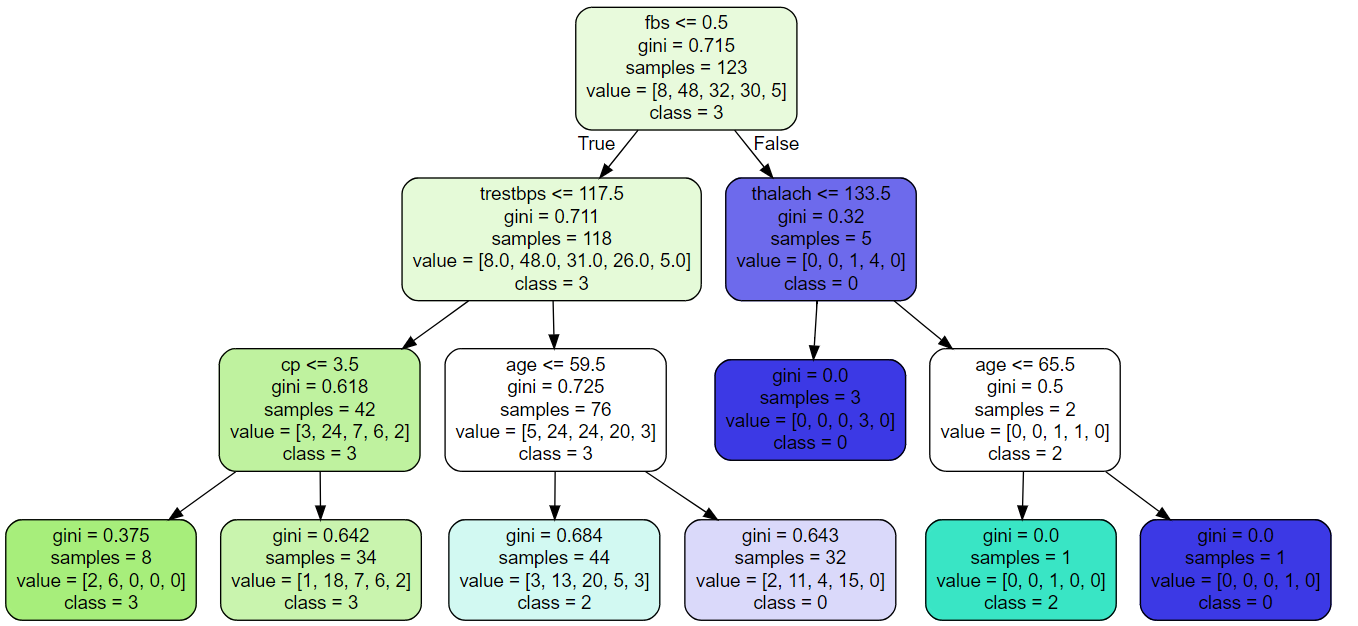

In [25]:
%matplotlib inline
from IPython.display import Image
Image('./heart_disease_graph.png')

- На данном графике можно заметить различные условия, которые были автоматически сформированы для наулучшего предсказания сердечного заболевания